### ANALYSIS OF PARIS AND NEW YORK AIRBNB'S

WHY THIS ANALYSIS ?

* It seems that Airbnbs in Paris and New york are the ones with the most reviews, therefore they are the most popular 

KEY OBJECTIVES 

* Determine what drives the popularity of Airbnbs in Paris and New York by examining the volume of reviews and other metrics. 
* Investigate the relationship of instant bookable options and review ratings to identify pros and cons
* Indentify expensive neighbourhoods in Paris and New Yokr by analyzing average nightly prices 
* Compare performance of normal host versus superhosts in every aspect, to see if being superhost has a significant impact

PARIS ANALYSIS QUESTIONS 

1. If we have a higher frequency of instant bookable reservations, why guests tend to give worse reviews ?

2. Being normal hosts or super hosts, tends to change their occupancy rate? And how prices and scores tends to change bettween them? 

3. Who are the top 10 most expensive neighbourhoods to stay in paris ?

4. How prices change depending on the number of accommodates in Elsyee neighbourhood  ?

5. Who are the top 4 worst neighbourhoods to stay in paris ?

6. What trends can be observed in the number of hosts over the years, and how price varies over time ? 


NEW YORK ANALYSIS QUESTIONS

1. Who are the top 10 most expensive neighbourhoods to stay in New York ?

2. What trends can be observed in the number of hosts over the years, and how price varies over time  ? 

3. What patterns emerge in the number of super hosts and the variation of average prices over the time ?





In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_listings_all = pd.read_csv(r"C:\Users\LENOVO\Downloads\Python\Maven Analytics\Listings.csv", encoding='ISO-8859-1')
pd.set_option('display.max.columns',33)
df_listings_all.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17280\698264307.py:1: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_listings_all = pd.read_csv(r"C:\Users\LENOVO\Downloads\Python\Maven Analytics\Listings.csv", encoding='ISO-8859-1')


,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,district,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Buttes-Montmartre,NaN,Paris,48.88668,2.33343,Entire apartment,Entire place,2,1.0,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",53,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Buttes-Montmartre,NaN,Paris,48.88617,2.34515,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""...",120,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Elysee,NaN,Paris,48.88112,2.31712,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",...",89,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Vaugirard,NaN,Paris,48.84571,2.30584,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Wifi"", ""Long ter...",58,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Passy,NaN,Paris,48.85500,2.26979,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Ha...",60,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [3]:
# Changing column host_since to Datetime format
df_listings_all['host_since'] = pd.to_datetime(df_listings_all['host_since'])

In [4]:
# Getting the columns that we want 
df_listings = df_listings_all[['host_since', 'neighbourhood', 'city' , 'accommodates', 'host_is_superhost', 'host_total_listings_count', 'instant_bookable', 'price', 'review_scores_rating']]
df_listings

,host_since,neighbourhood,city,accommodates,host_is_superhost,host_total_listings_count,instant_bookable,price,review_scores_rating
0,2011-12-03,Buttes-Montmartre,Paris,2,f,1.0,f,53,100.0
1,2013-11-29,Buttes-Montmartre,Paris,2,f,1.0,f,120,100.0
2,2014-07-31,Elysee,Paris,2,f,1.0,f,89,100.0
3,2013-12-17,Vaugirard,Paris,2,f,1.0,f,58,100.0
4,2014-12-14,Passy,Paris,2,f,1.0,f,60,100.0
...,...,...,...,...,...,...,...,...,...
279707,2015-04-13,Observatoire,Paris,2,f,1.0,f,120,100.0
279708,2013-11-27,Buttes-Montmartre,Paris,2,f,1.0,f,60,100.0
279709,2012-04-27,Buttes-Montmartre,Paris,2,f,1.0,f,50,100.0
279710,2015-07-16,Popincourt,Paris,2,f,1.0,f,105,100.0


In [5]:
# Filter only information about paris
paris_airbnb = df_listings[df_listings['city'] == 'Paris']
paris_airbnb = paris_airbnb.dropna(how= 'any')

In [6]:
paris_airbnb.isna().sum()

host_since                   0
neighbourhood                0
city                         0
accommodates                 0
host_is_superhost            0
host_total_listings_count    0
instant_bookable             0
price                        0
review_scores_rating         0
dtype: int64

In [7]:
# Changing formats of host_is_superhost and instant_bookable columns
paris_airbnb.loc[:, 'host_is_superhost'] = np.where(paris_airbnb['host_is_superhost'] == 'f', 0, 1)
paris_airbnb.loc[:, 'instant_bookable'] = np.where(paris_airbnb['instant_bookable'] == 'f', 0, 1)

paris_airbnb.head()

,host_since,neighbourhood,city,accommodates,host_is_superhost,host_total_listings_count,instant_bookable,price,review_scores_rating
0,2011-12-03,Buttes-Montmartre,Paris,2,0,1.0,0,53,100.0
1,2013-11-29,Buttes-Montmartre,Paris,2,0,1.0,0,120,100.0
2,2014-07-31,Elysee,Paris,2,0,1.0,0,89,100.0
3,2013-12-17,Vaugirard,Paris,2,0,1.0,0,58,100.0
4,2014-12-14,Passy,Paris,2,0,1.0,0,60,100.0


Pre-Question 

What means this analysis ?

In [8]:
paris_airbnb.groupby('instant_bookable')[['review_scores_rating','price', 'host_total_listings_count']].mean()

,review_scores_rating,price,host_total_listings_count
instant_bookable,,,
0,93.667154,101.805955,4.291098
1,91.675616,119.995250,20.553077


1)  If we have a higher frequency of instant bookable reservations, why guests tend to give worse reviews ?

 Short explanation of what is instant_bookable 
 
 * Having Instant_bookable means that the host can book the listing immediately without the need for prior approval from the host

*  In the otherhand the reservation requires host approval before it can be confirmed. 
 
 Explanation of why this is happening

 * First we can see that the price is more higher if the instant_bookable is available 

 * This makes sense since by having more flexibility with reservations and it may seem more attractive to guests. 

 But it seems that they have lower reviews

 - This could mean that guests prefer to have a more real experience with the host themselves and therefore be more trustworthy

 - Also, hosts who accept instant bookings could be accumulating many reservations and therefore not providing the best experience to each of the guests
 
 - Therefore, the slight change in their reviews could be reflected there

2.  Being normal hosts or super hosts, tends to change their occupancy rate? And how prices and scores tends to change bettween them?

In [9]:
paris_airbnb.groupby('host_is_superhost')['host_total_listings_count'].sum().reset_index()

,host_is_superhost,host_total_listings_count
0,0,419877.0
1,1,22373.0


In [10]:
paris_airbnb.groupby('host_is_superhost')[['review_scores_rating','price']].mean()

,review_scores_rating,price
host_is_superhost,,
0,92.344664,104.404625
1,96.881102,122.704856


3.   Who are the top 10 most expensive neighbourhoods to stay in paris 

In [11]:
# Top 10 more expensive neighbourhoods in paris
paris_expensive_neighbourhoods = paris_airbnb.groupby('neighbourhood')['price'].mean().sort_values(ascending= False).to_frame().reset_index().rename(columns={'price' :'mean price'}).head(10)
paris_expensive_neighbourhoods.head()

,neighbourhood,mean price
0,Elysee,179.386113
1,Louvre,170.078337
2,Luxembourg,151.184594
3,Bourse,145.603728
4,Hotel-de-Ville,139.822355


Text(0.5, 1.0, 'Mean price per Neighbourhood')

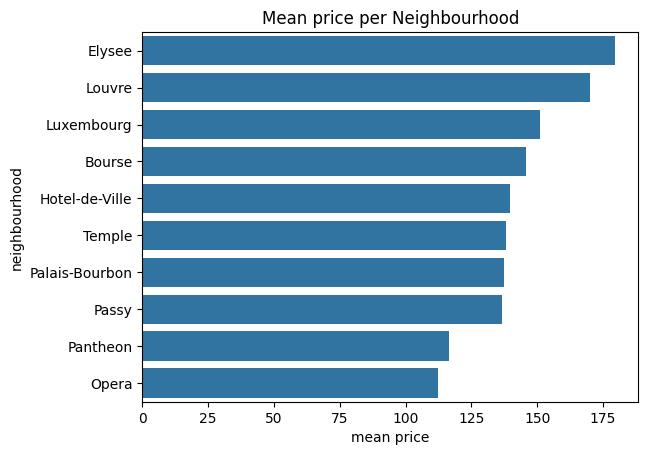

In [12]:
sns.barplot(data= paris_expensive_neighbourhoods, x= 'mean price', y= 'neighbourhood', orient= 'h')
plt.title('Mean price per Neighbourhood')

4. How prices change depending on the number of accommodates in Elsyee neighbourhood?

In [13]:
Elsyee_stats = paris_airbnb[paris_airbnb['neighbourhood'] == 'Elysee']
Elsyee_stats.groupby('accommodates')['price'].mean().to_frame().reset_index().sort_values(by= 'price', ascending=False)

,accommodates,price
13,14,971.000000
12,13,842.500000
10,11,805.000000
9,10,500.857143
11,12,491.000000
8,9,393.666667
6,7,319.105263
7,8,314.000000
5,6,297.572581
4,5,249.549020


5. Who are the top 4 worst neighbourhoods to stay in paris ?

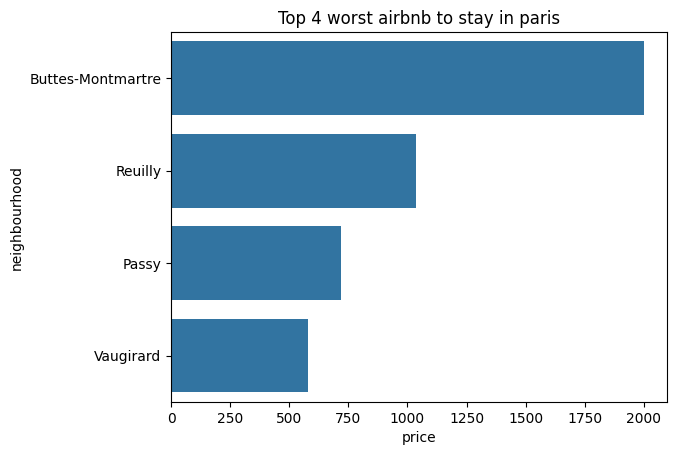

<Figure size 300x200 with 0 Axes>

In [14]:
worst_airbnb = df_listings[df_listings['review_scores_rating']== 20]
worst_airbnb_paris = worst_airbnb[worst_airbnb['city'] == 'Paris'].sort_values(by='price', ascending=False).head(4)
worst_airbnb_paris.head(4)
sns.barplot(data= worst_airbnb_paris, x= 'price', y= 'neighbourhood', orient='h')
plt.title('Top 4 worst airbnb to stay in paris')
plt.figure(figsize=(3,2))
plt.show()

6. What trends can be observed in the number of hosts over the years, and how price varies over time ? 

In [15]:
host_over_time_Paris = paris_airbnb.set_index('host_since').resample('YE').agg({'neighbourhood' : 'count', 'price' : 'mean'}).reset_index().rename(columns= {'neighbourhood' : 'number_of_airbnbs', 'price' : 'mean_price'})
host_over_time_Paris

,host_since,number_of_airbnbs,mean_price
0,2008-12-31,4,77.750000
1,2009-12-31,91,158.483516
2,2010-12-31,327,125.516820
3,2011-12-31,1077,124.823584
4,2012-12-31,3598,110.544191
5,2013-12-31,6448,106.644851
6,2014-12-31,8318,100.428108
7,2015-12-31,8921,101.544558
8,2016-12-31,6542,111.340569
9,2017-12-31,3479,100.172463


### Conclusions of Paris Airbns

* Super hosts tends to have less occupancy rates but get more positive reviews comparing with normal hosts 
* Elsyee is one of the most expensive neighbourhoods in paris
* Elsyee neighbourhood have a maximum capacity accommodantes up to 14 guests, with an average pricing ranging from 900 to 970 euros 
* Vaungirard, Passy, Reuilly and Buttes-Montmartre neighbourhoods are some of the worst rated airbnbs 
* 2014 and 2015 were the most dynamic years regarded to the number of hosts and airbnbs 



### NEW YORK ANALYSIS


In [16]:
df_listings_all.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,district,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Buttes-Montmartre,NaN,Paris,48.88668,2.33343,Entire apartment,Entire place,2,1.0,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",53,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Buttes-Montmartre,NaN,Paris,48.88617,2.34515,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""...",120,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Elysee,NaN,Paris,48.88112,2.31712,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",...",89,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Vaugirard,NaN,Paris,48.84571,2.30584,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Wifi"", ""Long ter...",58,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Passy,NaN,Paris,48.85500,2.26979,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Ha...",60,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [17]:
df_listings = df_listings_all[['host_since', 'neighbourhood', 'city' , 'accommodates', 'host_is_superhost', 'host_total_listings_count', 'price', 'review_scores_rating']]
df_listings.head()

,host_since,neighbourhood,city,accommodates,host_is_superhost,host_total_listings_count,price,review_scores_rating
0,2011-12-03,Buttes-Montmartre,Paris,2,f,1.0,53,100.0
1,2013-11-29,Buttes-Montmartre,Paris,2,f,1.0,120,100.0
2,2014-07-31,Elysee,Paris,2,f,1.0,89,100.0
3,2013-12-17,Vaugirard,Paris,2,f,1.0,58,100.0
4,2014-12-14,Passy,Paris,2,f,1.0,60,100.0


In [18]:
NY_airbnb = df_listings[df_listings['city'] == 'New York']
NY_airbnb.head()

,host_since,neighbourhood,city,accommodates,host_is_superhost,host_total_listings_count,price,review_scores_rating
9220,2013-10-23,Lower East Side,New York,3,f,1.0,110,80.0
9221,2013-10-02,Harlem,New York,2,f,1.0,99,90.0
9222,2014-09-27,Crown Heights,New York,6,f,1.0,220,87.0
9223,2014-10-18,Nolita,New York,2,f,1.0,215,100.0
9224,2012-10-14,Midtown,New York,3,f,1.0,300,93.0


In [19]:
NY_airbnb.isna().sum()
NY_airbnb = NY_airbnb.dropna(how= 'any')

In [20]:
NY_airbnb.loc[:, 'host_is_superhost'] = np.where(NY_airbnb['host_is_superhost'] == 'f', 0, 1)

NY_airbnb.head()

,host_since,neighbourhood,city,accommodates,host_is_superhost,host_total_listings_count,price,review_scores_rating
9220,2013-10-23,Lower East Side,New York,3,0,1.0,110,80.0
9221,2013-10-02,Harlem,New York,2,0,1.0,99,90.0
9222,2014-09-27,Crown Heights,New York,6,0,1.0,220,87.0
9223,2014-10-18,Nolita,New York,2,0,1.0,215,100.0
9224,2012-10-14,Midtown,New York,3,0,1.0,300,93.0


1.  Who are the top 10 most expensive neighbourhoods to stay in New York ?

In [21]:
NY_expensive_neighbourhoods = NY_airbnb.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).to_frame().reset_index().rename(columns={'price' : 'mean'})
NY_expensive_neighbourhoods.head(10)

,neighbourhood,mean
0,Flatiron District,346.160714
1,Sea Gate,336.125000
2,Tribeca,329.788235
3,Tottenville,309.000000
4,Willowbrook,309.000000
5,SoHo,258.419512
6,Woodrow,255.000000
7,Holliswood,254.500000
8,Arverne,245.660714
9,Vinegar Hill,235.000000


2. What trends can be observed in the number of hosts over the years, and how price varies over time ? 

In [22]:
host_over_time_NY = NY_airbnb.set_index('host_since').resample('YE').agg({'neighbourhood' : 'count', 'price' : 'mean'}).reset_index().rename(columns= {'neighbourhood' : 'number_of_airbnbs', 'price' : 'mean_price'})
host_over_time_NY

,host_since,number_of_airbnbs,mean_price
0,2008-12-31,21,95.142857
1,2009-12-31,191,129.638743
2,2010-12-31,587,139.899489
3,2011-12-31,1543,169.593001
4,2012-12-31,2510,148.930677
5,2013-12-31,3050,141.689836
6,2014-12-31,3905,130.451472
7,2015-12-31,4106,122.498052
8,2016-12-31,3137,131.116672
9,2017-12-31,2359,115.164900


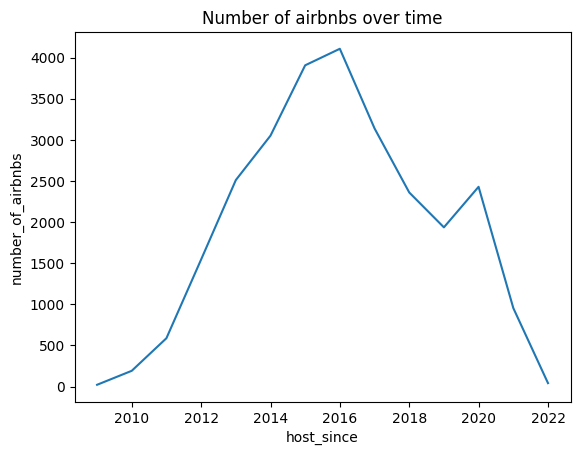

In [23]:
sns.lineplot(data= host_over_time_NY, x= 'host_since', y= 'number_of_airbnbs')
plt.title('Number of airbnbs over time')
plt.show()

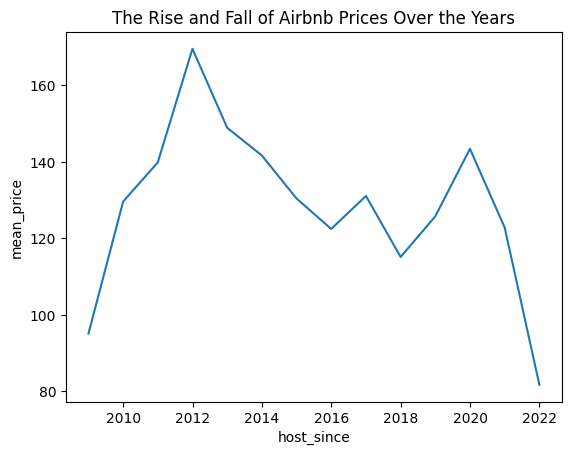

In [24]:
sns.lineplot(data= host_over_time_NY, x= 'host_since', y= 'mean_price')
plt.title('The Rise and Fall of Airbnb Prices Over the Years')
plt.show()

In [25]:
NY_airbnb.head()

,host_since,neighbourhood,city,accommodates,host_is_superhost,host_total_listings_count,price,review_scores_rating
9220,2013-10-23,Lower East Side,New York,3,0,1.0,110,80.0
9221,2013-10-02,Harlem,New York,2,0,1.0,99,90.0
9222,2014-09-27,Crown Heights,New York,6,0,1.0,220,87.0
9223,2014-10-18,Nolita,New York,2,0,1.0,215,100.0
9224,2012-10-14,Midtown,New York,3,0,1.0,300,93.0


3. What patterns emerge in the number of super hosts and the variation of average prices over the time ?

In [26]:
super_host_data_set = NY_airbnb[NY_airbnb['host_is_superhost']== 1]

In [27]:
super_host_data_set.set_index('host_since').resample('YE').agg({'host_total_listings_count' : 'count', 'price' : 'mean'}).reset_index().rename(columns= {'host_total_listings' : 'total_super_host', 'price' : 'mean_price'})

,host_since,host_total_listings_count,mean_price
0,2008-12-31,14,96.642857
1,2009-12-31,55,105.509091
2,2010-12-31,174,137.580460
3,2011-12-31,431,171.266821
4,2012-12-31,583,139.368782
5,2013-12-31,717,140.273361
6,2014-12-31,843,134.393832
7,2015-12-31,878,129.766515
8,2016-12-31,863,121.748552
9,2017-12-31,631,116.505547


In [28]:
NY_airbnb.head()

,host_since,neighbourhood,city,accommodates,host_is_superhost,host_total_listings_count,price,review_scores_rating
9220,2013-10-23,Lower East Side,New York,3,0,1.0,110,80.0
9221,2013-10-02,Harlem,New York,2,0,1.0,99,90.0
9222,2014-09-27,Crown Heights,New York,6,0,1.0,220,87.0
9223,2014-10-18,Nolita,New York,2,0,1.0,215,100.0
9224,2012-10-14,Midtown,New York,3,0,1.0,300,93.0


### Conclusions of New York airbnbs

* Flatiron District is one of the most expensive neighbourhoods in New York 
* 2014 and 2015 were the most vigorous years regarded to the number of hosts and airbnbs
* The analysis indicates that 2014 and 2015 were crucial years of the airbnb market, marked by a significant increase in super hosts.

### General conclusions 

* For both Paris and New York 2014 and 2015 were pivotal years in the growth of airbnb market
* These years also saw heightened activity among super hosts, suggesting that the rapid expansion of the platform during this period of time led to a higher level of engagement amont top-tier hosts. 